<a href="https://colab.research.google.com/github/aradhanasaha/notebooks/blob/main/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms

In [26]:
# Define the tickers for Adani, Reliance, Tata, and Nifty 50
tickers = ['APOLLOHOSP.NS', 'BHARTIARTL.NS', 'ADANIPORTS.NS', '^NSEI']  # NSE suffix indicates NSE (National Stock Exchange) listings

# Define the time period
start_date = '2014-01-01'
end_date = '2023-12-31'

# Download historical data
data = yf.download(tickers, start=start_date, end=end_date, interval='1mo')['Adj Close']

# Calculate monthly returns
returns = data.pct_change().dropna()

# Separate data for individual stocks and Nifty 50
adani_returns = returns['ADANIPORTS.NS']
apollo_returns = returns['APOLLOHOSP.NS']
airtel_returns = returns['BHARTIARTL.NS']
nifty_returns = returns['^NSEI']


[*********************100%%**********************]  4 of 4 completed


In [27]:
rf=pd.read_csv('repo.csv')

In [28]:
rf['Date']=pd.to_datetime(rf['Date'])
rf.set_index('Date',inplace=True)
rf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2024-08-02 to 2013-03-05
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RBI Repo Rate  45 non-null     object
dtypes: object(1)
memory usage: 720.0+ bytes


In [29]:
rf.sort_index(inplace=True)
rf.head()

,RBI Repo Rate
Date,
2013-03-05,7.25%
2013-09-20,7.50%
2013-10-29,7.75%
2014-01-28,8.00%
2015-01-15,7.75%


In [30]:
merged_df = pd.merge_asof(nifty_returns, rf, left_index=True, right_index=True)


In [31]:
repo = (merged_df['RBI Repo Rate']).str.strip('%').astype(float)/(100*12)
repo.head()

Date
2014-02-01    0.006667
2014-03-01    0.006667
2014-04-01    0.006667
2014-05-01    0.006667
2014-06-01    0.006667
Name: RBI Repo Rate, dtype: float64

In [32]:
#Getting the excess market returns
ex_mkt_return = nifty_returns - repo
ex_mkt_return.head()

Date
2014-02-01    0.024116
2014-03-01    0.061400
2014-04-01   -0.007830
2014-05-01    0.073011
2014-06-01    0.046086
dtype: float64

In [33]:
#Adani
adani_ex_return = adani_returns - repo
adani_ex_return.head()

Date
2014-02-01    0.131476
2014-03-01    0.114111
2014-04-01   -0.002666
2014-05-01    0.202154
2014-06-01    0.064542
dtype: float64

In [34]:
X= sm.add_constant(ex_mkt_return)
model = sm.OLS(adani_ex_return, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     91.35
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           2.40e-16
Time:                        13:36:18   Log-Likelihood:                 139.83
No. Observations:                 119   AIC:                            -275.7
Df Residuals:                     117   BIC:                            -270.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.007      1.024      0.3

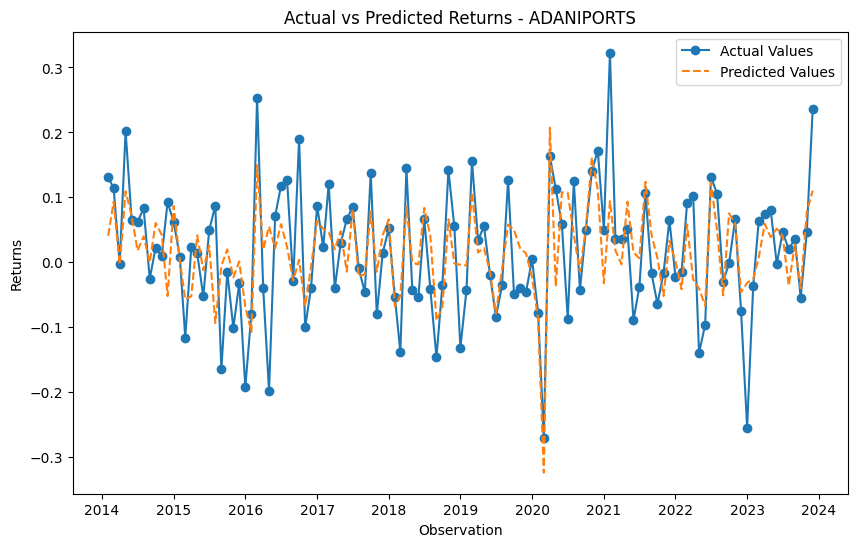

In [58]:
# Predicted values
predicted_values = model.predict(X)

# Actual values
actual_values = adani_ex_return

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', marker='o')
plt.plot(predicted_values, label='Predicted Values', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Returns')
plt.title('Actual vs Predicted Returns - ADANIPORTS')
plt.legend()
plt.show()

In [35]:
#Apollo
apo_ex_return =apollo_returns - repo
apo_ex_return.head()

Date
2014-02-01   -0.017310
2014-03-01   -0.010850
2014-04-01   -0.030781
2014-05-01    0.008260
2014-06-01    0.089566
dtype: float64

In [36]:
model1 = sm.OLS(apo_ex_return, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     20.44
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.48e-05
Time:                        13:36:21   Log-Likelihood:                 116.84
No. Observations:                 119   AIC:                            -229.7
Df Residuals:                     117   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.008      1.172      0.2

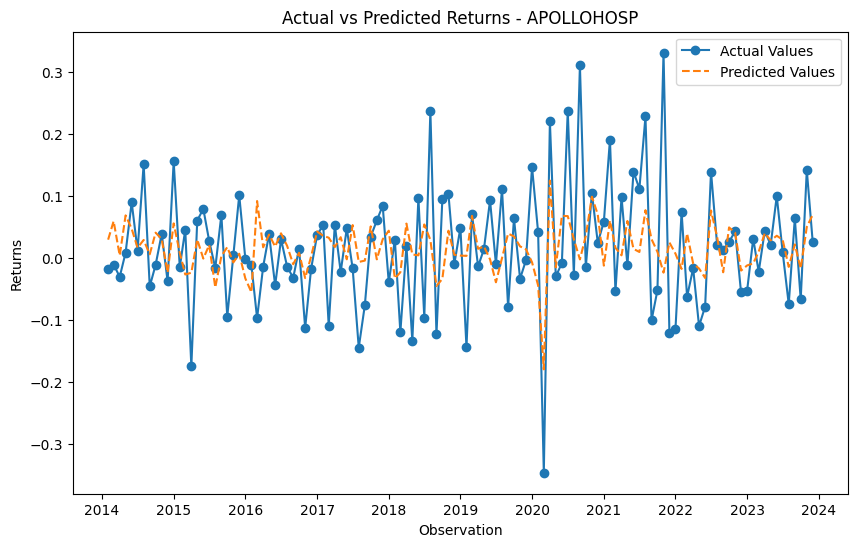

In [59]:
# Predicted values
predicted_values = model1.predict(X)

# Actual values
actual_values = apo_ex_return

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', marker='o')
plt.plot(predicted_values, label='Predicted Values', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Returns')
plt.title('Actual vs Predicted Returns - APOLLOHOSP')
plt.legend()
plt.show()

In [37]:
#Airtel
air_ex_return=airtel_returns-repo
air_ex_return.head()

Date
2014-02-01   -0.093651
2014-03-01    0.098166
2014-04-01    0.025749
2014-05-01    0.042259
2014-06-01   -0.027591
dtype: float64

In [38]:
model2 = sm.OLS(air_ex_return, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     29.09
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           3.65e-07
Time:                        13:36:24   Log-Likelihood:                 152.20
No. Observations:                 119   AIC:                            -300.4
Df Residuals:                     117   BIC:                            -294.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.006      0.688      0.4

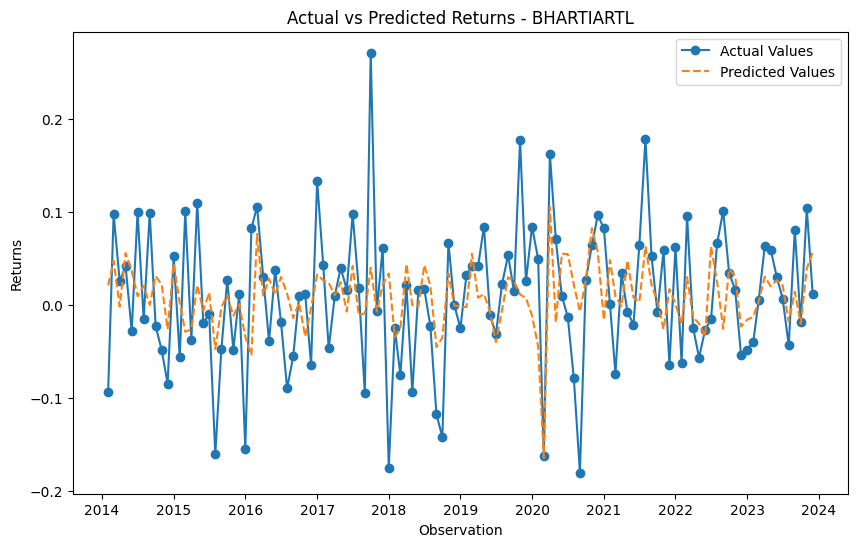

In [60]:
# Predicted values
predicted_values = model2.predict(X)

# Actual values
actual_values = air_ex_return

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', marker='o')
plt.plot(predicted_values, label='Predicted Values', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Returns')
plt.title('Actual vs Predicted Returns - BHARTIARTL')
plt.legend()
plt.show()

In [39]:
#Model Diagnostics function
def run_model_diagnostics(ticker_ex_return, model_name,X):
  # Calculate residuals
  residuals = model_name.resid

  # Plot residuals vs. fitted values
  plt.scatter(model_name.predict(X), residuals)
  plt.xlabel("Fitted values")
  plt.ylabel("Residuals")
  plt.title("Residuals vs. Fitted Values")
  plt.axhline(y=0, color='r', linestyle='--')
  plt.show()

  # Histogram of residuals
  plt.hist(residuals, bins=20)
  plt.xlabel("Residuals")
  plt.ylabel("Frequency")
  plt.title("Histogram of Residuals")
  plt.show()

  # Q-Q plot
  stats.probplot(residuals, dist="norm", plot=plt)
  plt.title("Q-Q Plot of Residuals")
  plt.show()

  # Calculate VIF
  vif = pd.DataFrame()
  vif["Variable"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  print(vif)


  # Plot residuals against predictor variables or fitted values
  plt.scatter(model_name.predict(X), residuals)  # Assuming X is a numpy array with the constant term added
  plt.xlabel("Predictor Variables or Fitted Values")
  plt.ylabel("Residuals")
  plt.title("Residuals vs. Predictor Variables or Fitted Values")
  plt.axhline(y=0, color='r', linestyle='--')
  plt.show()

  # Perform Breusch-Pagan test for homoscedasticity
  bp_test = sms.het_breuschpagan(residuals, X)
  print("Breusch-Pagan test p-value:", bp_test[1])

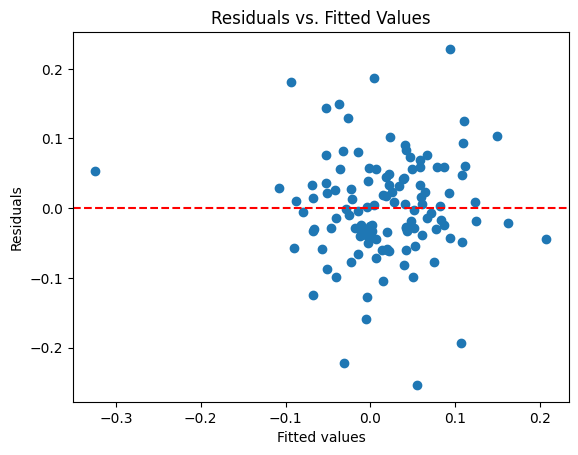

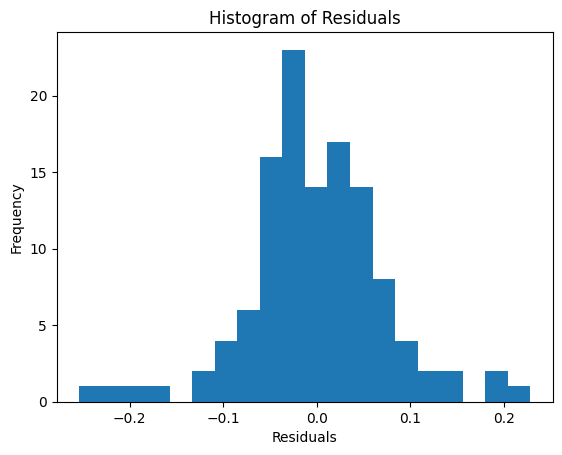

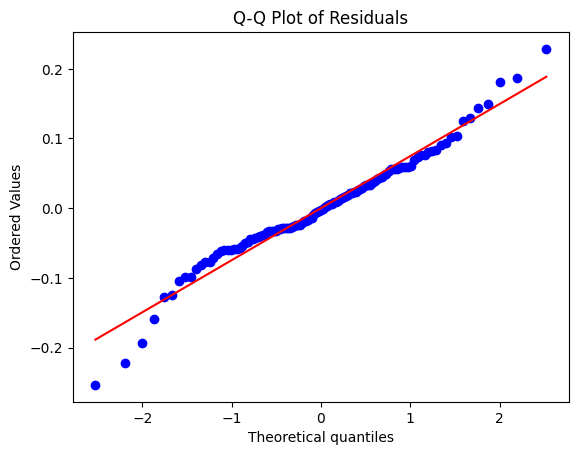

  Variable       VIF
0    const  1.022343
1        0  1.000000


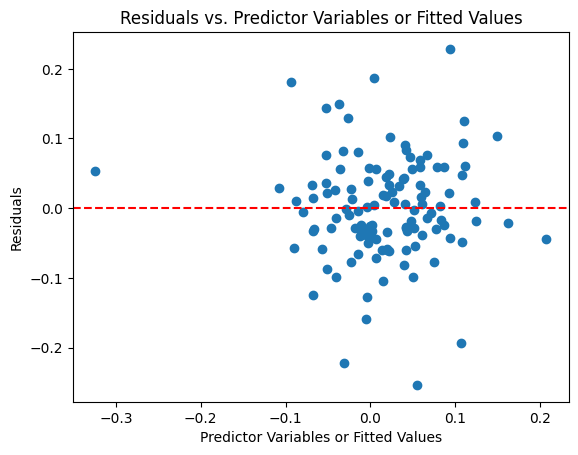

Breusch-Pagan test p-value: 0.9108263379969358


In [ ]:
run_model_diagnostics(adani_ex_return,model,X)

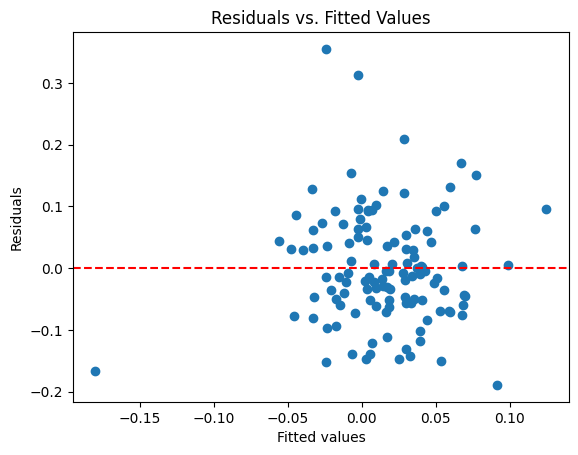

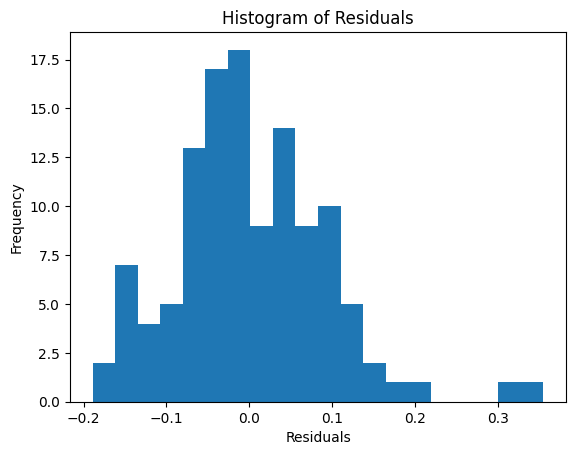

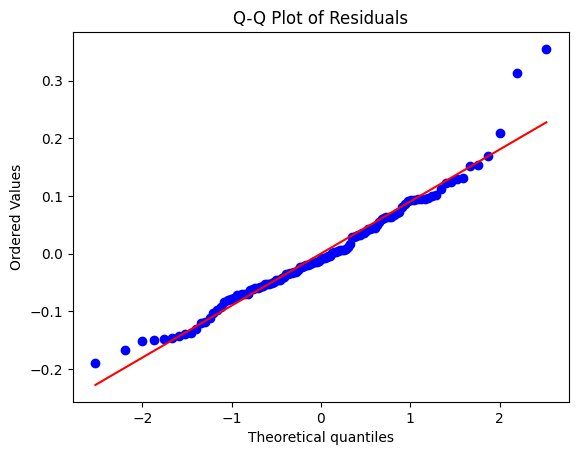

  Variable       VIF
0    const  1.022343
1        0  1.000000


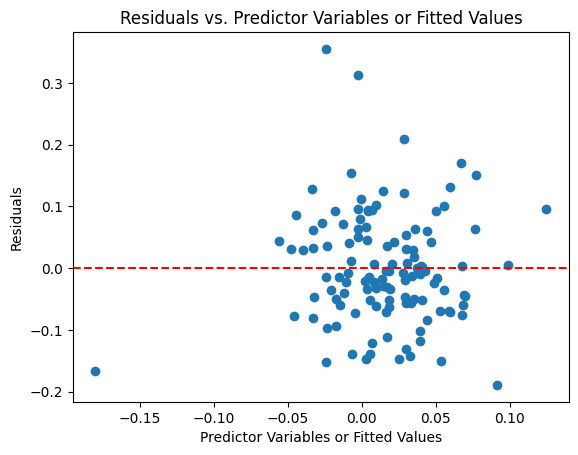

Breusch-Pagan test p-value: 0.31437447166401333


In [40]:
run_model_diagnostics(apo_ex_return,model1,X)

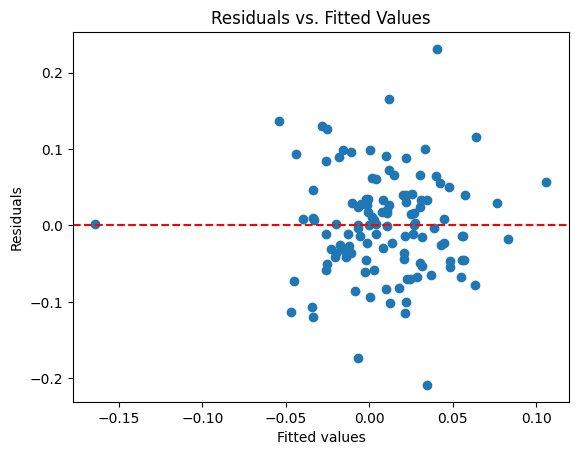

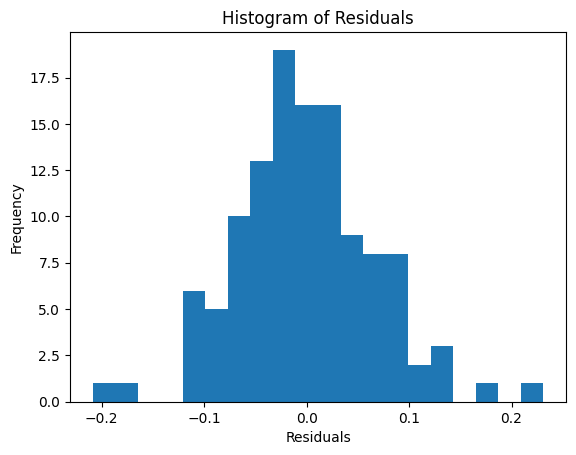

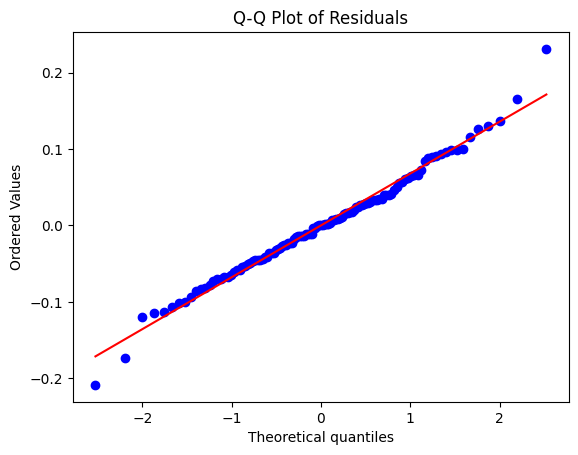

  Variable       VIF
0    const  1.022343
1        0  1.000000


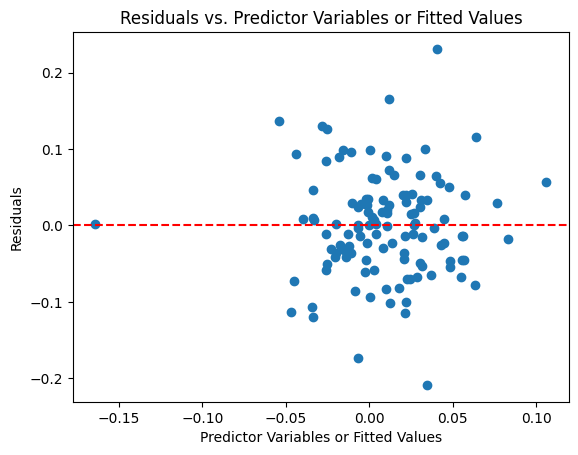

Breusch-Pagan test p-value: 0.834037750878159


In [41]:
run_model_diagnostics(air_ex_return,model2,X)

In [42]:
def sub_sample_tests(ticker_ex_return):
  midpoint_index = len(ticker_ex_return)//2
  # Split the data into two equal subperiods
  first_subperiod = ticker_ex_return[:midpoint_index]
  second_subperiod = ticker_ex_return[midpoint_index:]
  ex_mkt_return1 = ex_mkt_return[:midpoint_index]
  ex_mkt_return2 =ex_mkt_return[midpoint_index:]

  X1 = sm.add_constant(ex_mkt_return1)
  model1 = sm.OLS(first_subperiod, X1).fit()

  # Print regression summary
  print(model1.summary())

  #Model diagnostics for 1st subperiod
  run_model_diagnostics(first_subperiod,model1,X1)

  X2 = sm.add_constant(ex_mkt_return2)
  model2 = sm.OLS(second_subperiod, X2).fit()

  # Print regression summary
  print(model2.summary())

  #Model diagnostics for 2nd subperiod
  run_model_diagnostics(second_subperiod,model2,X2)



In [56]:
midpoint_index = len(adani_ex_return)//2
first_subperiod = adani_ex_return[:midpoint_index]
second_subperiod = adani_ex_return[midpoint_index:]
second_subperiod


Date
2019-01-01   -0.131515
2019-02-01   -0.042797
2019-03-01    0.155503
2019-04-01    0.033741
2019-05-01    0.055790
2019-06-01   -0.019181
2019-07-01   -0.084387
2019-08-01   -0.035377
2019-09-01    0.127439
2019-10-01   -0.048346
2019-11-01   -0.039240
2019-12-01   -0.046510
2020-01-01    0.004790
2020-02-01   -0.078133
2020-03-01   -0.270134
2020-04-01    0.163488
2020-05-01    0.112833
2020-06-01    0.058742
2020-07-01   -0.086788
2020-08-01    0.125315
2020-09-01   -0.042687
2020-10-01    0.049629
2020-11-01    0.140338
2020-12-01    0.172101
2021-01-01    0.050310
2021-02-01    0.322741
2021-03-01    0.035874
2021-04-01    0.036032
2021-05-01    0.050773
2021-06-01   -0.088903
2021-07-01   -0.038113
2021-08-01    0.106081
2021-09-01   -0.017231
2021-10-01   -0.064182
2021-11-01   -0.016537
2021-12-01    0.064591
2022-01-01   -0.022504
2022-02-01   -0.015619
2022-03-01    0.090942
2022-04-01    0.102841
2022-05-01   -0.139760
2022-06-01   -0.096140
2022-07-01    0.131874
2022-0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     36.95
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.07e-07
Time:                        13:36:43   Log-Likelihood:                 68.967
No. Observations:                  59   AIC:                            -133.9
Df Residuals:                      57   BIC:                            -129.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0082      0.010      0.819      0.4

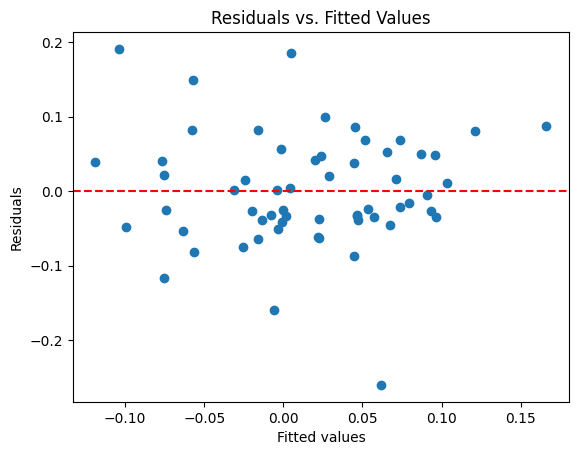

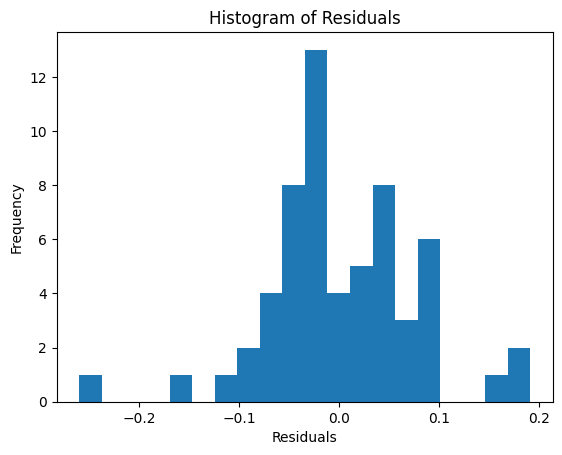

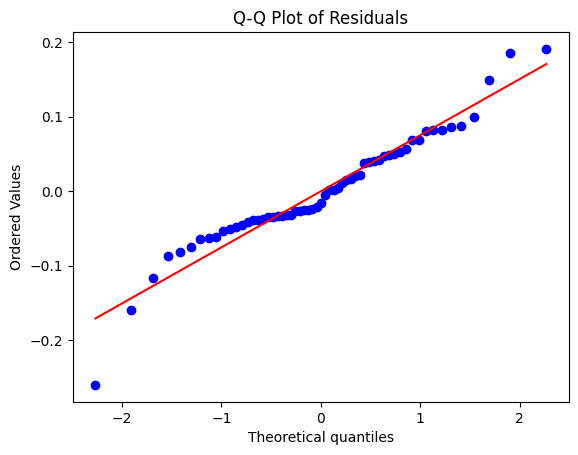

  Variable      VIF
0    const  1.01597
1        0  1.00000


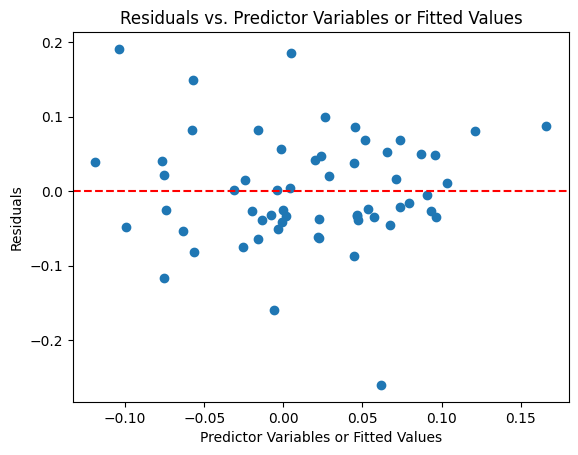

Breusch-Pagan test p-value: 0.44532209072573614
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     54.19
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           7.24e-10
Time:                        13:36:44   Log-Likelihood:                 71.187
No. Observations:                  60   AIC:                            -138.4
Df Residuals:                      58   BIC:                            -134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

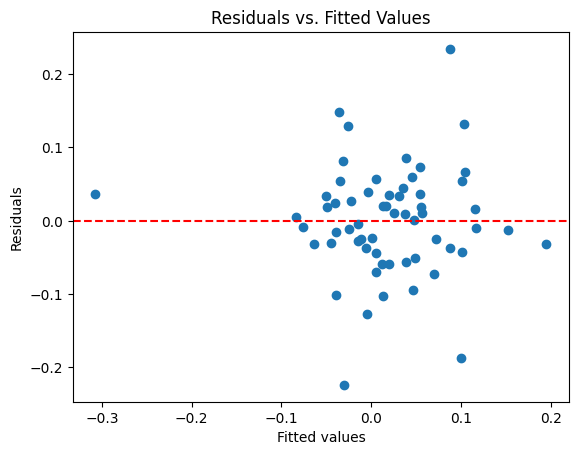

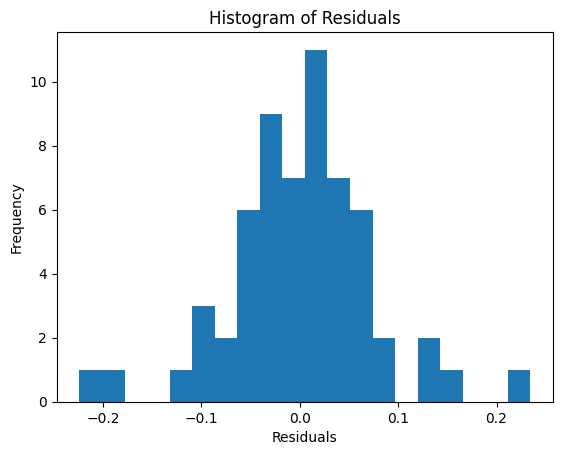

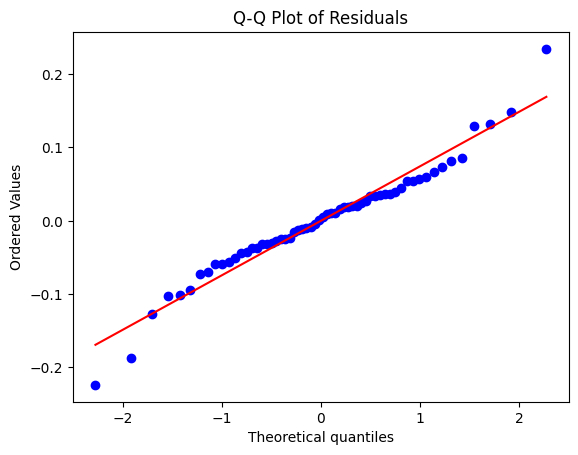

  Variable       VIF
0    const  1.028709
1        0  1.000000


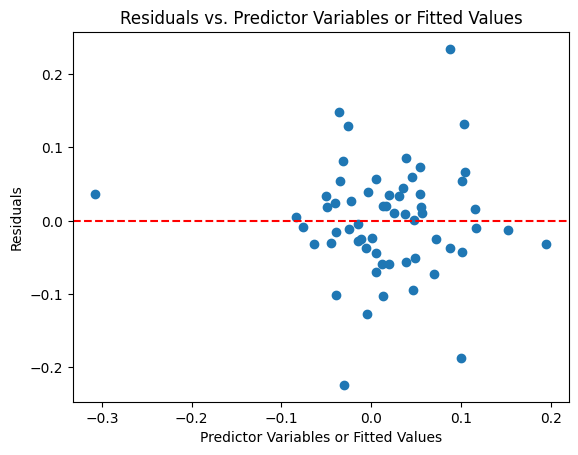

Breusch-Pagan test p-value: 0.5285684164782651


In [43]:
sub_sample_tests(adani_ex_return)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.860
Date:                Sat, 02 Mar 2024   Prob (F-statistic):             0.0963
Time:                        13:38:23   Log-Likelihood:                 67.755
No. Observations:                  59   AIC:                            -131.5
Df Residuals:                      57   BIC:                            -127.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.010      0.074      0.9

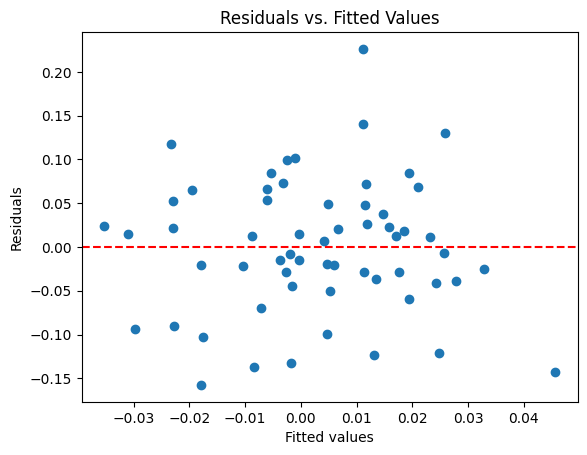

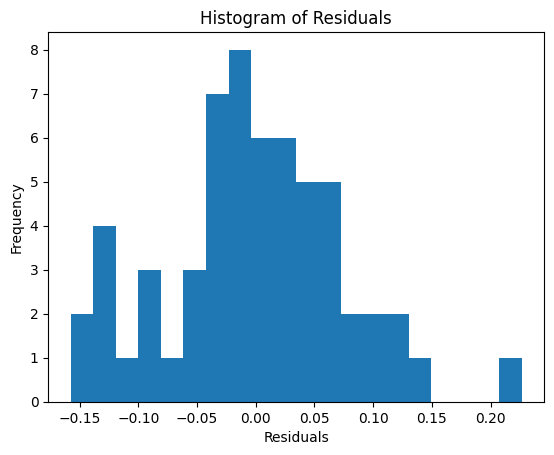

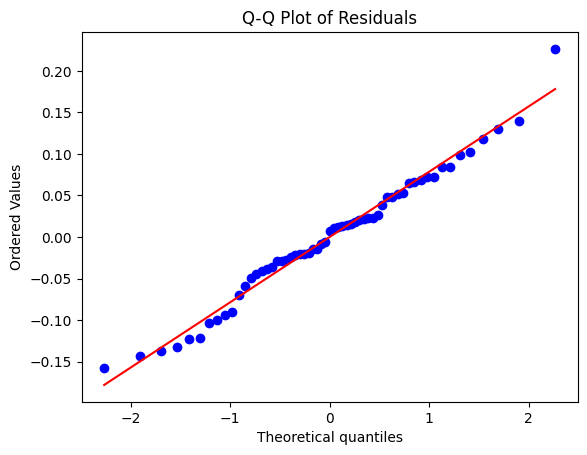

  Variable      VIF
0    const  1.01597
1        0  1.00000


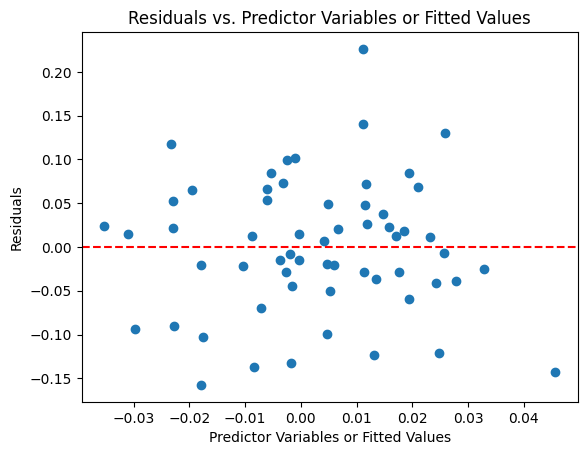

Breusch-Pagan test p-value: 0.722349926832437
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     16.01
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           0.000181
Time:                        13:38:24   Log-Likelihood:                 53.044
No. Observations:                  60   AIC:                            -102.1
Df Residuals:                      58   BIC:                            -97.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

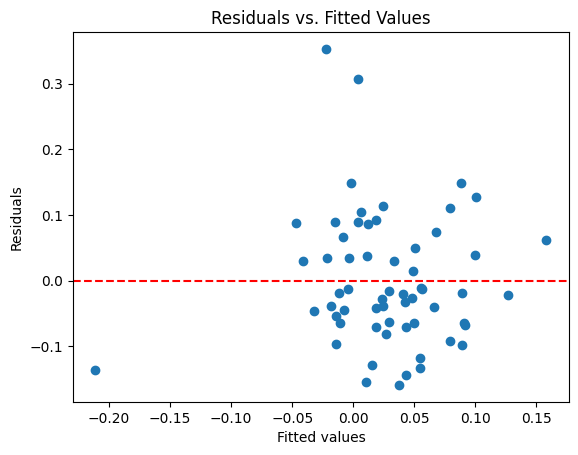

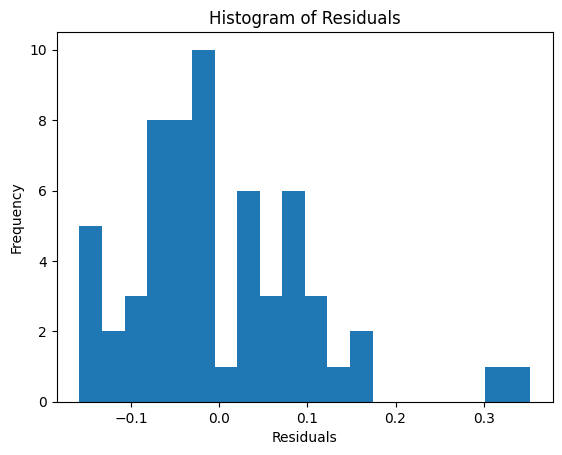

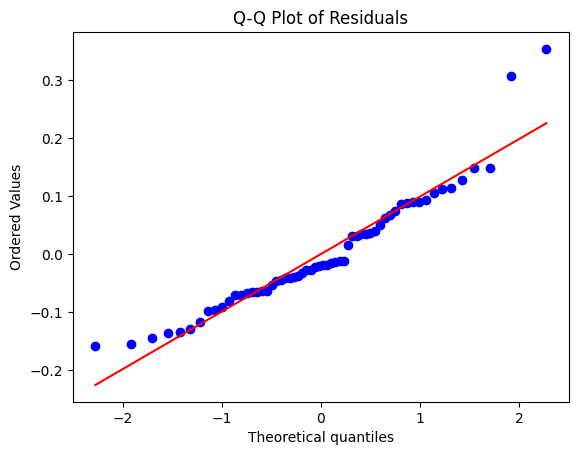

  Variable       VIF
0    const  1.028709
1        0  1.000000


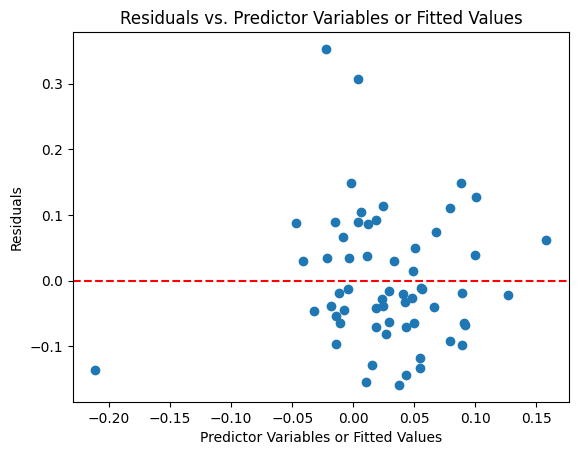

Breusch-Pagan test p-value: 0.22559649732473927


In [44]:
sub_sample_tests(apo_ex_return)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     13.60
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           0.000506
Time:                        13:43:01   Log-Likelihood:                 71.430
No. Observations:                  59   AIC:                            -138.9
Df Residuals:                      57   BIC:                            -134.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0064      0.010     -0.661      0.5

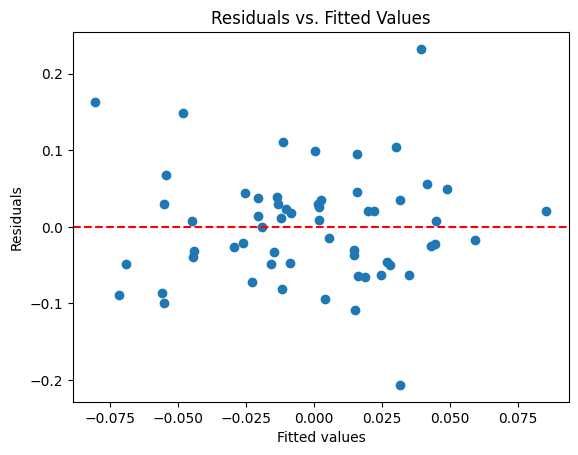

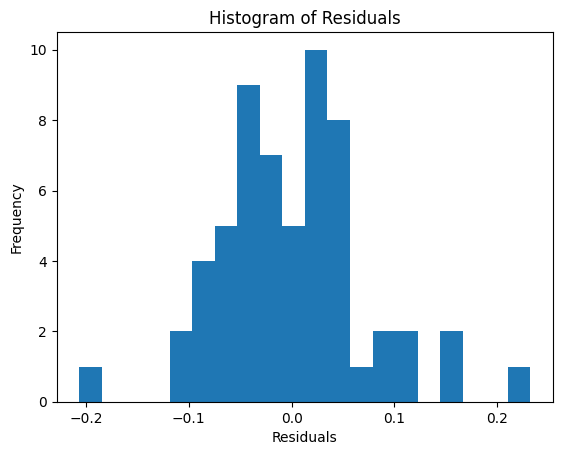

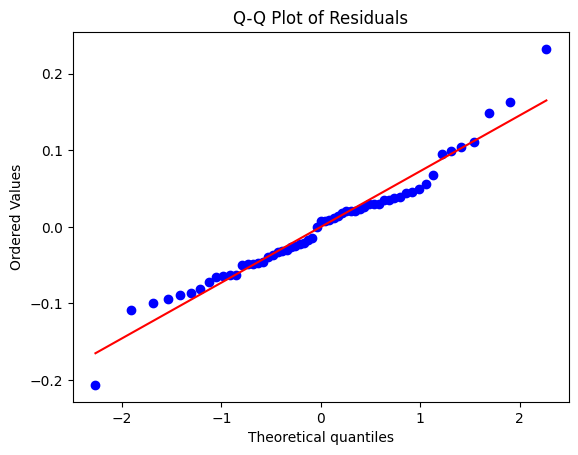

  Variable      VIF
0    const  1.01597
1        0  1.00000


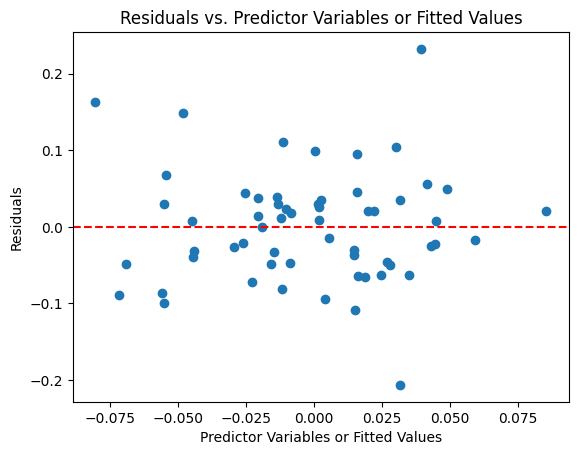

Breusch-Pagan test p-value: 0.9795854005509532
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     16.83
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           0.000129
Time:                        13:43:02   Log-Likelihood:                 83.630
No. Observations:                  60   AIC:                            -163.3
Df Residuals:                      58   BIC:                            -159.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

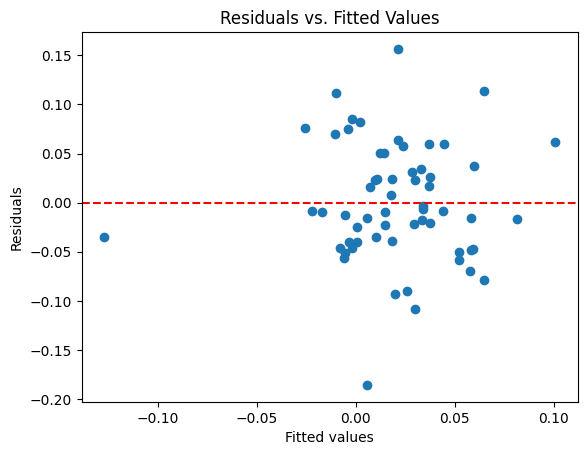

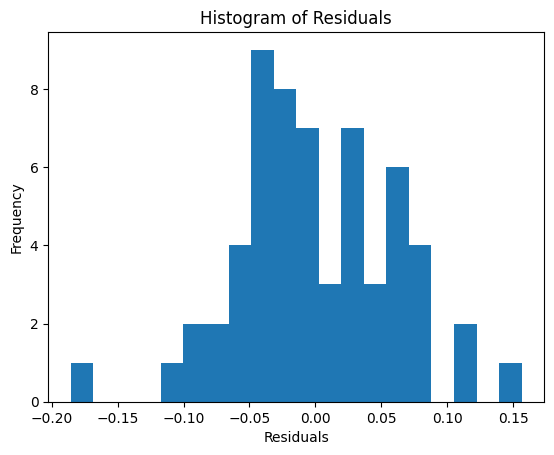

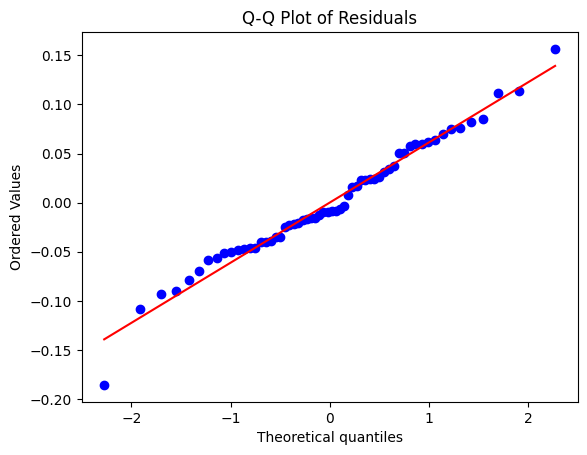

  Variable       VIF
0    const  1.028709
1        0  1.000000


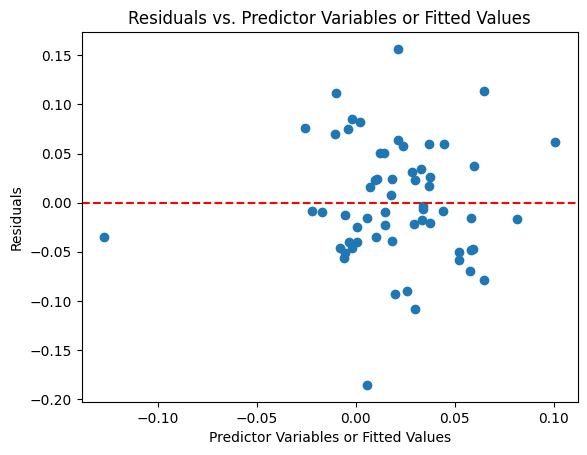

Breusch-Pagan test p-value: 0.9187840562312252


In [45]:
sub_sample_tests(air_ex_return)

In [47]:
StockReturns = returns.iloc[:,:3]
# Create an array of equal weights across all assets
portfolio_weights_ew = np.array([1/3] * 3)

# Calculate the equally-weighted portfolio returns
Portfolio = StockReturns.mul(portfolio_weights_ew, axis=1).sum(axis=1)

<Figure size 1000x600 with 0 Axes>

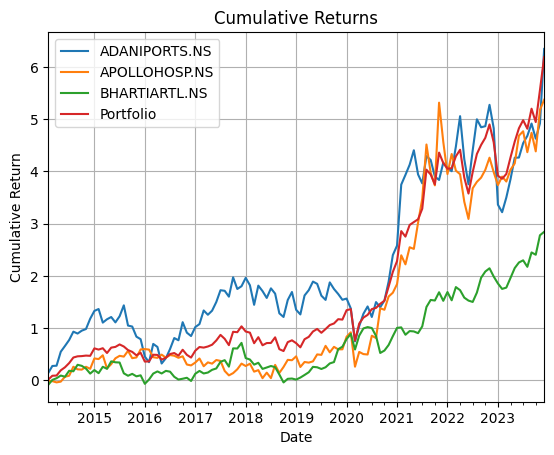

In [48]:
# Calculate cumulative returns
cumulative_returns_stock = (1 + StockReturns).cumprod() - 1
cumulative_return_portfolio = (1 + Portfolio).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(10, 6))
cumulative_returns_stock.plot(label='Stock Returns')
cumulative_return_portfolio.plot(label='Portfolio')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
len(Portfolio)

119

In [49]:
#Portfolio Regression - Whole Sample
modelW = sm.OLS(Portfolio, X).fit()

# Print regression summary
print(modelW.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     118.5
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.75e-19
Time:                        13:49:13   Log-Likelihood:                 198.91
No. Observations:                 119   AIC:                            -393.8
Df Residuals:                     117   BIC:                            -388.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.004      2.817      0.0

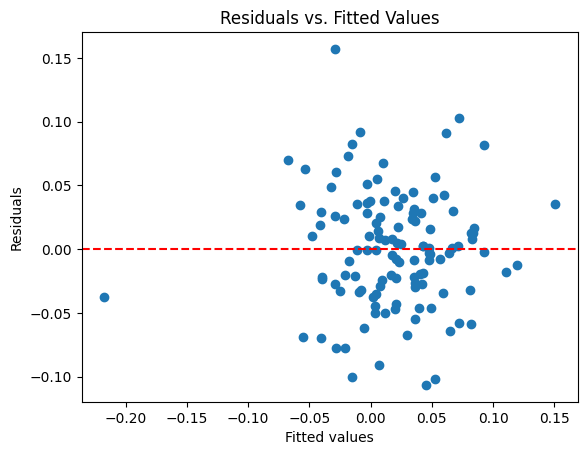

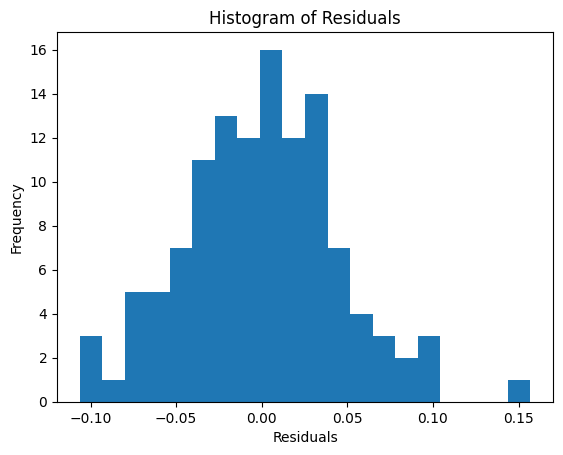

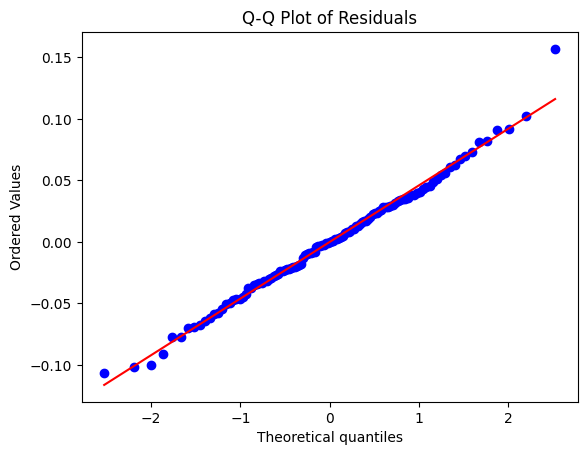

  Variable       VIF
0    const  1.022343
1        0  1.000000


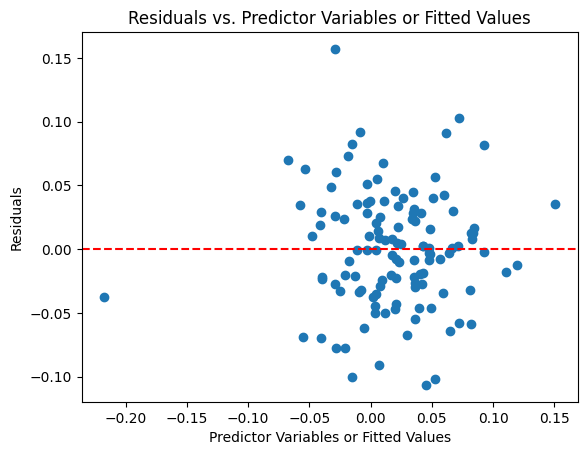

Breusch-Pagan test p-value: 0.20436183432249738


In [50]:
#Portfolio Model Diagnostics - Whole Sample
run_model_diagnostics(Portfolio,modelW,X)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     44.22
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.22e-08
Time:                        14:02:05   Log-Likelihood:                 102.20
No. Observations:                  59   AIC:                            -200.4
Df Residuals:                      57   BIC:                            -196.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0065      0.006      1.146      0.2

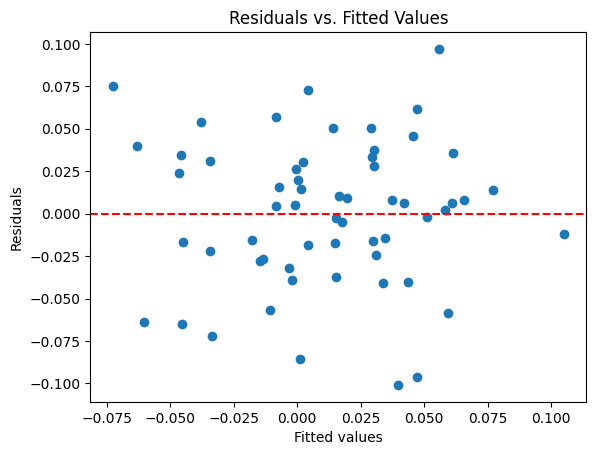

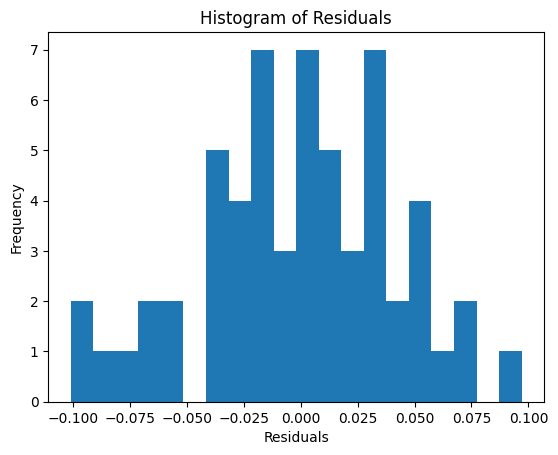

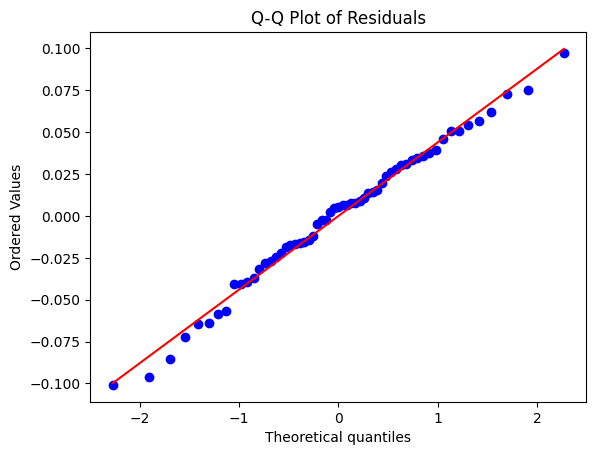

  Variable      VIF
0    const  1.01597
1        0  1.00000


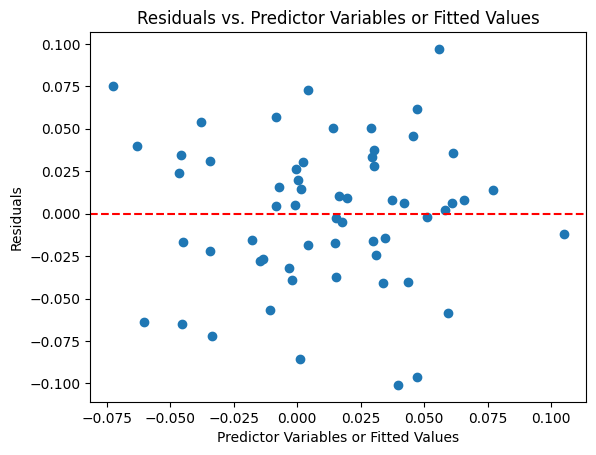

Breusch-Pagan test p-value: 0.675349706604373
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     69.94
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.51e-11
Time:                        14:02:07   Log-Likelihood:                 97.863
No. Observations:                  60   AIC:                            -191.7
Df Residuals:                      58   BIC:                            -187.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

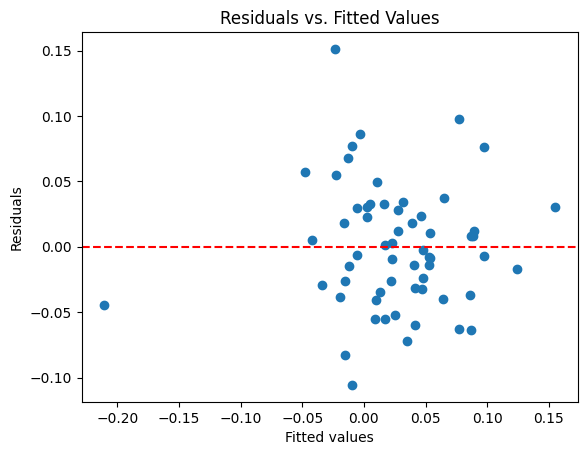

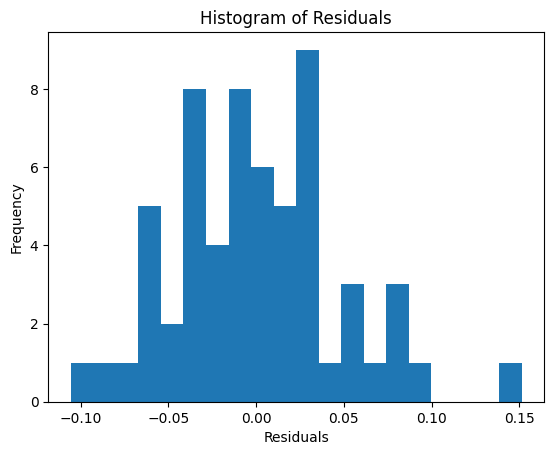

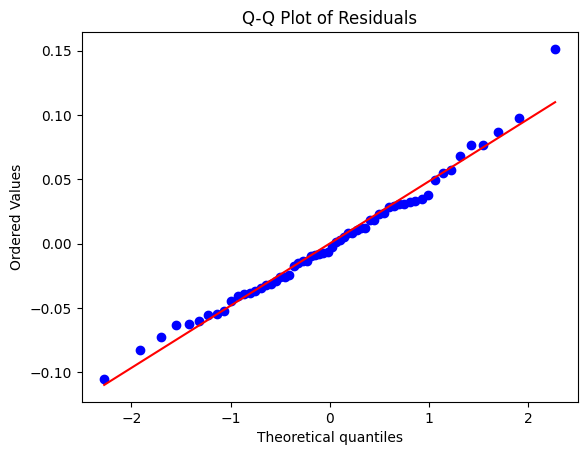

  Variable       VIF
0    const  1.028709
1        0  1.000000


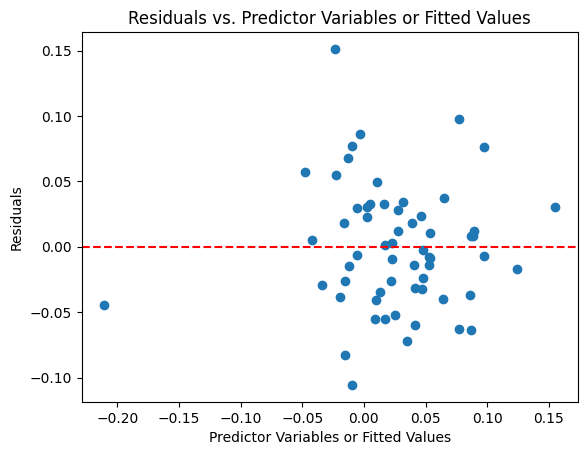

Breusch-Pagan test p-value: 0.21245221676077325


In [51]:
#Portfolio - Regression and Diagnostics - Sub Samples
sub_sample_tests(Portfolio)

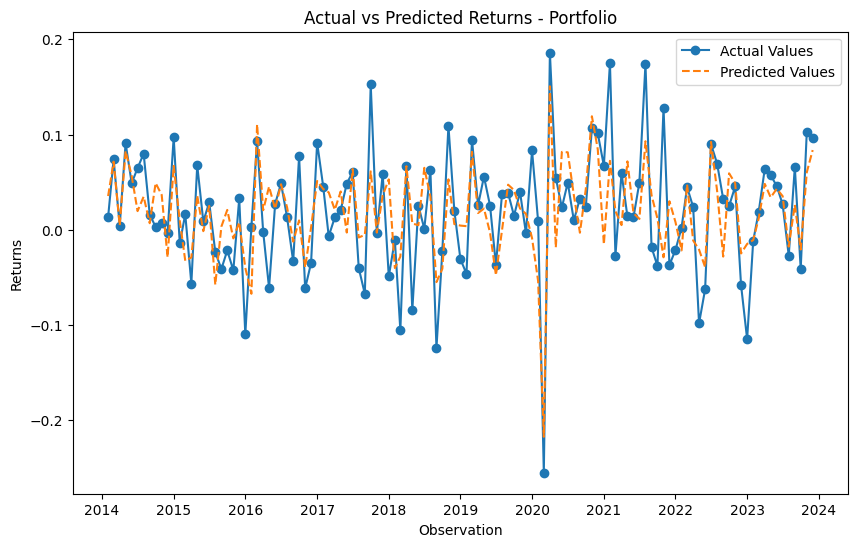

In [61]:
# Predicted values
predicted_values = modelW.predict(X)
# Actual values
actual_values = Portfolio
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', marker='o')
plt.plot(predicted_values, label='Predicted Values', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Returns')
plt.title('Actual vs Predicted Returns - Portfolio')
plt.legend()
plt.show()